In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

/opt/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


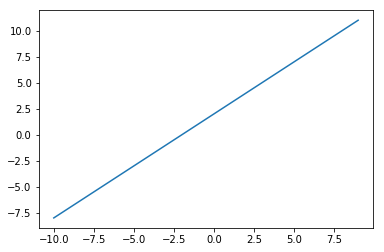

In [2]:
px = np.arange(-10, 10)
py = 1 * px + 2
plt.plot(px, py)

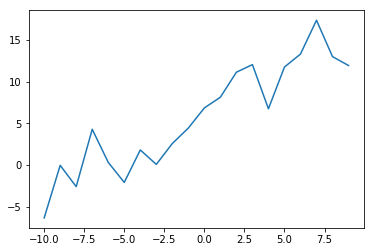

In [3]:
noise = np.random.random(len(px))
m, c = 1, 2
pynoise = m * px + c + 10 * noise
plt.plot(px, pynoise)

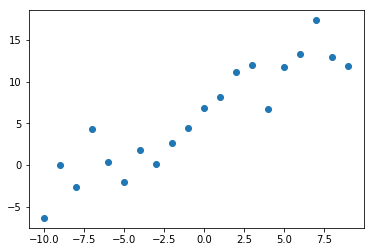

In [4]:
plt.scatter(px, pynoise)

Cost ::  40.12260634321719
Cost ::  22.429833360761403
Cost ::  18.903246172890068
Cost ::  17.072224884666504
Cost ::  16.22775482526049
Cost ::  15.940353752230294
Cost ::  15.952975321700796
Cost ::  16.114345636311917
Cost ::  16.3375603211578
Cost ::  16.574516982072964
Cost ::  16.80015141502954
Cost ::  17.00283031699073
Cost ::  17.178510566987825
Cost ::  17.327239517727868
Cost ::  17.451108621413187
Cost ::  17.553076173179033
Cost ::  17.636287053738123
Cost ::  17.703763876516497
Cost ::  17.758204783662222
Cost ::  17.801964756523375
80.7267103195


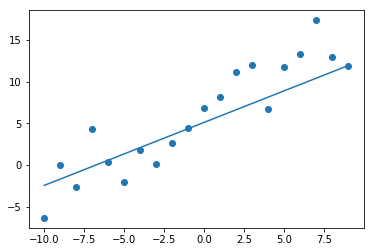

In [11]:
# placeholder for training instances
x = tf.placeholder(dtype=tf.float32, name='x')
y = tf.placeholder(dtype=tf.float32, name='y')

# will updated by some magic functions
# weight
w = tf.Variable(dtype=tf.float32, initial_value=np.random.random() * 0.01)
# bias
b = tf.Variable(dtype=tf.float32, initial_value=0)

# prediction y = mx + c
y_predicted = tf.add(tf.multiply(x, w), b)

# cost function for optimization (error)
cost = tf.reduce_mean((y - y_predicted) ** 2)
# defining scaler for tensorboard log
tf.summary.scalar('cost', cost)

# optimizer
# we use gradient descent optimizer with learning rate 0.01
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# training
with tf.Session() as sess:
    # initializing variable
    sess.run(tf.global_variables_initializer())
    for epoch in range(20): # 20 epoch
        epoch_cost = 0
        for j in range(len(pynoise)):
            _, c = sess.run([optimizer, cost], feed_dict = {
                x: px[j],
                y: pynoise[j]
            })
            epoch_cost += c
            
        print("Cost ::  {}".format(epoch_cost / len(pynoise)))
        yfitinner = w.eval() * px + b.eval()
#         plt.plot(px, yfitinner, label="%s epoch"%epoch)
    
    yfit = w.eval() * px + b.eval()
    plt.scatter(px, pynoise)
    plt.plot(px, yfit)
    op = w.eval() * 100 + b.eval()
    print(op)